In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv("/content/sample_data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


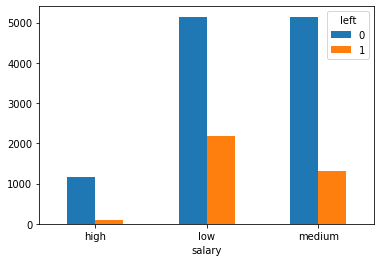

In [ ]:
crosstb = pd.crosstab( df.salary,df.left)
crosstb.plot.bar(rot=0)

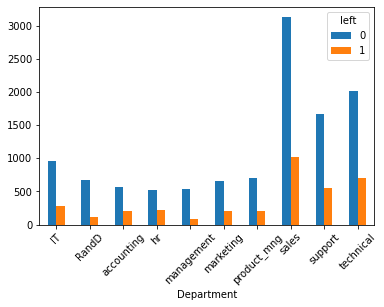

In [ ]:
crosstb = pd.crosstab( df.Department,df.left)
crosstb.plot.bar(rot=45)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
le=label_encoder.fit(df['salary'])
le.inverse_transform([1,2,2])

array(['low', 'medium', 'medium'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['salary']=label_encoder.fit_transform(df['salary'])
df['Department']=label_encoder.fit_transform(df['Department'])

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [ ]:
X=df.drop(columns=['left']).values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 7.  , 1.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 7.  , 2.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 7.  , 2.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 8.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 8.  , 1.  ]])

In [ ]:
Y=df['left'].values
Y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
 
transformer = make_column_transformer( (OneHotEncoder(), 
                                       [7, 8]), remainder="passthrough" )

from sklearn.compose import ColumnTransformer
 
ct=ColumnTransformer([('Department',OneHotEncoder(),[7]),('salary',OneHotEncoder(),[8])], remainder="passthrough")

In [ ]:
x1=ct.fit_transform(X)
x1[0]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.38,   0.53,   2.  ,
       157.  ,   3.  ,   0.  ,   0.  ])

In [ ]:
nam=ct.get_feature_names_out()
nam

array(['Department__x7_0.0', 'Department__x7_1.0', 'Department__x7_2.0',
       'Department__x7_3.0', 'Department__x7_4.0', 'Department__x7_5.0',
       'Department__x7_6.0', 'Department__x7_7.0', 'Department__x7_8.0',
       'Department__x7_9.0', 'salary__x8_0.0', 'salary__x8_1.0',
       'salary__x8_2.0', 'remainder__x0', 'remainder__x1',
       'remainder__x2', 'remainder__x3', 'remainder__x4', 'remainder__x5',
       'remainder__x6'], dtype=object)

In [ ]:
x=np.delete(x1,[9,10,14,15,17,18],axis=1)
x[0]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   0.38, 157.  ,   0.  ])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,train_size=0.2)

In [ ]:
clasi_model=linear_model.LogisticRegression()
clasi_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
clasi_model.score(x_train,y_train)

0.7782594198066022